In [1]:
# lab 3 Знайомство з нейромережами

In [2]:
# 1 Повнозв'язані нейронні мережі

In [3]:
from sklearn import preprocessing
import pandas as pd

df = pd.read_csv("../lab1/diabetes.csv")
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=list(df))
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [4]:

from sklearn.model_selection import train_test_split
import torch

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [5]:
import torch.nn as nn


class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)        
        self.relu = nn.ReLU()        
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)  
        x = self.relu(x)  
        x = self.fc2(x)  
        x = self.sigmoid(x)  
        return x  

input_size = X_train.shape[1]
hidden_size = 64
output_size = 1

model = NeuralNetwork(input_size, hidden_size, output_size)


In [6]:
from sklearn.metrics import accuracy_score
import torch.optim as optim

learning_rate = 0.001  
num_epochs = 1000  

criterion = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  

y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

history = {'loss':[], 'accuracy':[]}  

for epoch in range(num_epochs):
    outputs = model(X_train)  
    loss = criterion(outputs, y_train)  
    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step()  
    if (epoch + 1) % 100 == 0:
        with torch.no_grad():
            y_pred = model(X_test)  
            y_pred = (y_pred >= 0.5).float()  
            accuracy = accuracy_score(y_test, y_pred)  
        history['loss'].append(loss.item()) 
        history['accuracy'].append(accuracy)
        print(f'Epoch [{epoch + 1}/{num_epochs}], loss: {loss.item()}, accuracy: {accuracy}')

Epoch [100/1000], loss: 0.6134718060493469, accuracy: 0.6428571428571429
Epoch [200/1000], loss: 0.5406619310379028, accuracy: 0.6948051948051948
Epoch [300/1000], loss: 0.486876904964447, accuracy: 0.7597402597402597
Epoch [400/1000], loss: 0.45765963196754456, accuracy: 0.7597402597402597
Epoch [500/1000], loss: 0.4444999098777771, accuracy: 0.7467532467532467
Epoch [600/1000], loss: 0.43764469027519226, accuracy: 0.7532467532467533
Epoch [700/1000], loss: 0.4328915476799011, accuracy: 0.7467532467532467
Epoch [800/1000], loss: 0.4288090467453003, accuracy: 0.7467532467532467
Epoch [900/1000], loss: 0.425149142742157, accuracy: 0.7467532467532467
Epoch [1000/1000], loss: 0.4216025173664093, accuracy: 0.7597402597402597


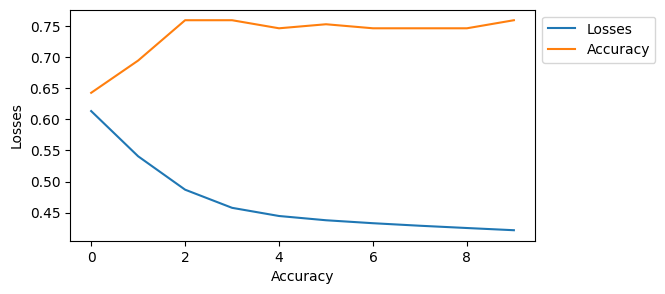

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(history['loss'])
plt.plot(history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

In [8]:
# 2 Згорткові нейронні мережі

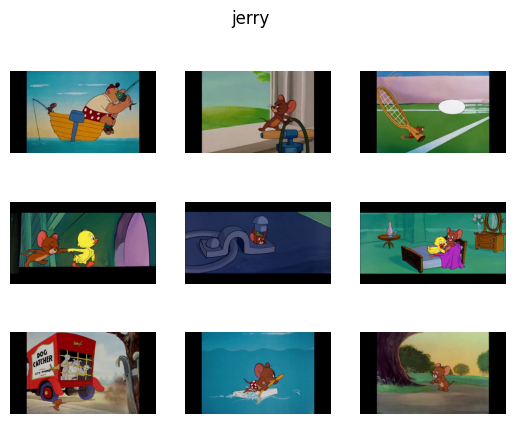

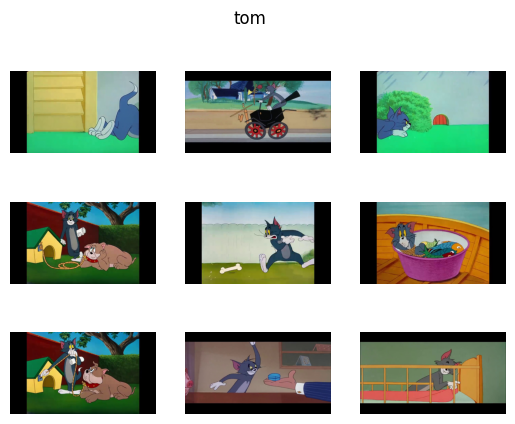

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

path = 'tom_and_jerry/tom_and_jerry/'
categories = ['jerry', 'tom']

# Load and display images
for category in categories:
    fig, axs = plt.subplots(3, 3)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path + category)[:9]):
        img = plt.imread(path + category + '/' + v)
        axs[k // 3, k % 3].imshow(img)
        axs[k // 3, k % 3].axis('off')
    plt.show()

X = []
y = []

# Load and preprocess images
for k, category in enumerate(categories):
    for f in os.listdir(path + category):
        image_path = path + category + '/' + f
        image = cv2.imread(image_path)
        image = cv2.resize(image, (55, 32))
        image = image / 255.0  
        X.append(image)
        y.append(k)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Embedding, LSTM
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(32, 55, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, y_train, batch_size=32, epochs=15)


Epoch 1/15
80/80 [==============================] - 1s 15ms/step - loss: 0.5611 - accuracy: 0.7279
Epoch 2/15
80/80 [==============================] - 1s 17ms/step - loss: 0.3136 - accuracy: 0.8754
Epoch 3/15
80/80 [==============================] - 1s 16ms/step - loss: 0.2333 - accuracy: 0.9093
Epoch 4/15
80/80 [==============================] - 1s 16ms/step - loss: 0.1596 - accuracy: 0.9424
Epoch 5/15
80/80 [==============================] - 1s 17ms/step - loss: 0.1197 - accuracy: 0.9641
Epoch 6/15
80/80 [==============================] - 1s 17ms/step - loss: 0.0812 - accuracy: 0.9783
Epoch 7/15
80/80 [==============================] - 1s 18ms/step - loss: 0.0575 - accuracy: 0.9874
Epoch 8/15
80/80 [==============================] - 1s 18ms/step - loss: 0.0462 - accuracy: 0.9894
Epoch 9/15
80/80 [==============================] - 2s 20ms/step - loss: 0.0377 - accuracy: 0.9913
Epoch 10/15
80/80 [==============================] - 2s 25ms/step - loss: 0.0264 - accuracy: 0.9941
Epoch 11/

Losses: 0.3829505145549774
Accuracy: 0.9227129220962524


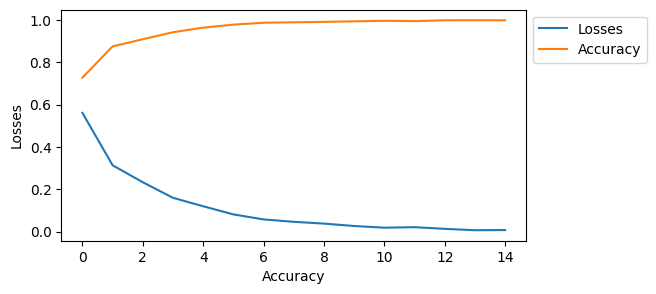

In [11]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()

In [12]:
# 3 Рекурентні нейронні мережі

In [13]:
from nltk.corpus import stopwords
from collections import Counter

df = pd.read_csv('../lab2/elden_ring_steam_reviews.csv', encoding='latin-1')
df = df[['review', 'voted_up']]
df = df.dropna()

for i in [True, False]:
    text = ''
    for j in df[df['voted_up'] == i]['review']:
        text += f"{j} "
    custom_stop_words = list(dict(sorted(Counter(text.split()).items(), key=lambda x:x[1], reverse=True)).keys())[:20]

def cleaning(raw_review):
    value = ''.join([c.lower() for c in raw_review if (c.isalpha() or c == ' ')])
    clean_review = ''
    for i in value.split(' '):
        if i not in stopwords.words("english") and i not in custom_stop_words:
            clean_review += i + ' '
    return clean_review


df['review'] = df['review'].apply(cleaning)

X = df['review']
y = df['voted_up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

token = Tokenizer(lower=False)
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

array = []
for i in X_train:
    array.append(len(i))
maxlen = int(np.ceil(np.mean(array))) 

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

total_words = len(token.word_index) + 1

model = Sequential()
model.add(Embedding(total_words, 32, input_length=maxlen))
model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
214/214 [==============================] - 4s 10ms/step - loss: 0.2760 - accuracy: 0.9410
Epoch 2/10
214/214 [==============================] - 2s 10ms/step - loss: 0.1690 - accuracy: 0.9424
Epoch 3/10
214/214 [==============================] - 2s 11ms/step - loss: 0.1224 - accuracy: 0.9583
Epoch 4/10
214/214 [==============================] - 2s 10ms/step - loss: 0.0911 - accuracy: 0.9731
Epoch 5/10
214/214 [==============================] - 2s 10ms/step - loss: 0.0701 - accuracy: 0.9792
Epoch 6/10
214/214 [==============================] - 2s 10ms/step - loss: 0.0571 - accuracy: 0.9842
Epoch 7/10
214/214 [==============================] - 2s 10ms/step - loss: 0.0471 - accuracy: 0.9865
Epoch 8/10
214/214 [==============================] - 2s 10ms/step - loss: 0.0409 - accuracy: 0.9889
Epoch 9/10
214/214 [==============================] - 2s 10ms/step - loss: 0.0354 - accuracy: 0.9896
Epoch 10/10
214/214 [==============================] - 2s 9ms/step - loss: 0.0323 - accurac

Losses: 0.26586484909057617
Accuracy: 0.9331058263778687


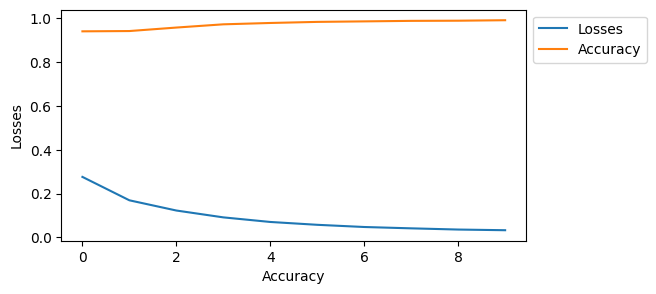

In [15]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

plt.figure(figsize=(6,3))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()